In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
print(len(train_data[0]), train_labels[0])
print(len(train_data[1]), train_labels[1])
print(len(train_data[2]), train_labels[2])

218 1
189 0
141 0


In [7]:
max([max(sequence) for sequence in train_data])

9999

In [18]:
# train_data[0]# 1,14,22,16,43

In [19]:
print(reverse_word_index.get(1-3,'?'))
print(reverse_word_index.get(14-3,'?'))
print(reverse_word_index.get(22-3,'?'))
print(reverse_word_index.get(16-3,'?'))
print(reverse_word_index.get(43-3,'?'))
print(reverse_word_index.get(43-3,'?'))
print(reverse_word_index.get(530-3,'?'))






?
this
film
was
just
just
brilliant


In [32]:
print(train_labels[0])

1


In [64]:
" ".join([reverse_word_index.get(i-3,"?") for i in train_data[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [24]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])


decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Listing 3.2 Encoding the integer sequences into a binary matrix

In [ ]:
   A    B    C
A  1.   0.   0
B. 0.   1.   0
C. 0.   0.   1

In [ ]:
1    2  3
the is me

In [ ]:
1,14,22,16,43

In [34]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
print(x_train[0])
print(len(x_train[0]))
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]
10000
[0. 1. 1. ... 0. 0. 0.]


In [40]:
print(x_train[1])
print(len(x_train[1]))
print(x_train[1])

[0. 1. 1. ... 0. 0. 0.]
10000
[0. 1. 1. ... 0. 0. 0.]


In [41]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Listing 3.3 The model definition

In [42]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Listing 3.4 Compiling the model

In [43]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy', # page 114
                      metrics=['accuracy'])


# Listing 3.5 Configuring the optimizer

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3.4.4 Validating your approach

In [44]:
print(len(x_train))

25000


In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Listing 3.8 Training your model

In [46]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - acc: 0.6934 - loss: 0.6026 - val_acc: 0.8628 - val_loss: 0.4097
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8948 - loss: 0.3549 - val_acc: 0.8826 - val_loss: 0.3221
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9173 - loss: 0.2582 - val_acc: 0.8871 - val_loss: 0.2883
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9379 - loss: 0.2034 - val_acc: 0.8828 - val_loss: 0.2909
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9467 - loss: 0.1700 - val_acc: 0.8849 - val_loss: 0.2800
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9574 - loss: 0.1418 - val_acc: 0.8872 - val_loss: 0.2854
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.9652 - loss: 0.1214 - val_acc: 0.8863 - val_loss: 0.2964
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9697 - loss: 0.1059 - val_acc: 0.8836 - val_loss: 0.3052
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.974

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

# Listing 3.9 Plotting the training and validation loss

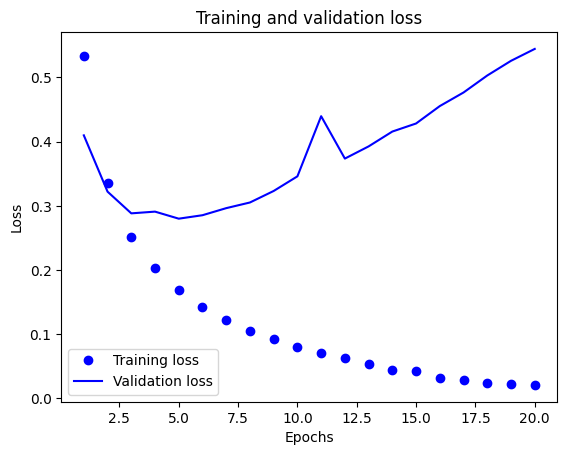

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.10 Plotting the training and validation accuracy

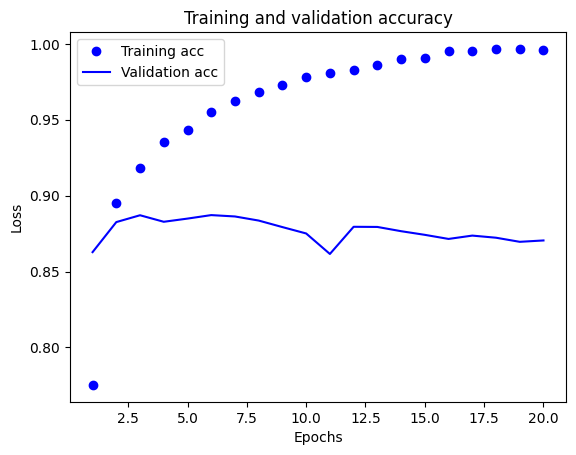

In [53]:
plt.clf()
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Listing 3.11 Retraining a model from scratch

In [54]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7171 - loss: 0.5684
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9015 - loss: 0.2913
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9233 - loss: 0.2171
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9360 - loss: 0.1784
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8800 - loss: 0.2988


In [55]:
results

[0.29523470997810364, 0.8823599815368652]

In [56]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.21420765],
       [0.9996308 ],
       [0.9117555 ],
       ...,
       [0.1409607 ],
       [0.10928693],
       [0.7420351 ]], dtype=float32)

In [57]:
print(len(x_test))

25000


In [58]:
print(x_test[0])
print(y_test[0])

[0. 1. 1. ... 0. 0. 0.]
0.0


In [62]:
sample1 = x_test[0].reshape(1,10000)
print(sample1)

[[0. 1. 1. ... 0. 0. 0.]]


In [63]:
model.predict(sample1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[0.21420765]], dtype=float32)

review """? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"""

read above review and provide positive or negative calss. output should be in JSON

```json
{
"output" : "positive"
}

note: pls don't give any other explanation.